##Regression
### 2. On the full batch gradient descent visualize the contours of J(W) for different values of the learning rate η.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# Getting the dataset uploaded on GitHub
url = 'https://raw.githubusercontent.com/Harshvg101/Harshvg101/main/ex1data2.txt' 
df = pd.read_csv(url, sep=',', header=None)
df = df-df.mean() 
df = df/df.std()

df.insert(0, 'bias', 1)
df.columns = ['bias', 'Area', 'Bedrooms', 'Standardized Price']
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


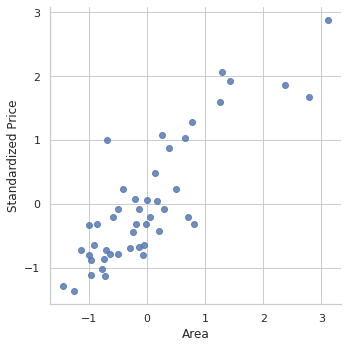

In [3]:
# Plotting standardized Price v/s Area : (Read data)
sns.set(style='whitegrid', context='notebook')
sns.lmplot(x='Area', y='Standardized Price', data=df, fit_reg=False)

In [4]:
# Making the Gradient Descent Class

class Batch_gradient_descent :
  def __init__(self, x, y, alpha, max_iterations, epsln, theta_seed=None) : 
    self.x = x
    self.y = y
    self.alpha = alpha
    self.max_iterations = max_iterations
    self.epsln = epsln
    if(theta_seed is not None) :
      self.theta = theta_seed 
    else :
      self.theta = np.random.randn(x.shape[0]+1, 1)

  def h(self, x, temp_theta=None) :
    if(temp_theta is None) :
      temp_theta = self.theta

    if(len(x)==len(temp_theta)-1) :
      x = np.insert(x, 0, 1) 

    return np.dot(temp_theta, x)

  # Cost function to calculate Mean Square Loss
  def cost_fn(self, ) :
    cost = 0
    for i in range(len(self.x)) :
      cost += (self.h(self.x[i]) - self.y[i])**2 

    cost /= 2*len(self.x)

    return cost

  # train function to train the model
  def train(self, ) :
    costs = []
    thetas = []

    thetas.append(self.theta)
    costs.append(self.cost_fn())

    # Update theta and gradient (grad)
    for i in range(self.max_iterations) :
      theta_update = self.theta.copy()
      for j in range(len(theta_update)) :
        grad = 0 
        for k in range(len(self.x)) :
          # updating the gradient
          grad += (self.h(self.x[k]) - self.y[k])*self.x[k][j]

        # Updating theta
        theta_update[j] -= self.alpha*grad/len(self.x) 

      self.theta = theta_update 

      thetas.append(self.theta)
      costs.append(self.cost_fn())
      if(abs(costs[i+1]-costs[i]) < self.epsln) :
        # print(i)
        # print(costs)
        break 

    return self.theta, thetas, costs

  # testing function to test the trained model
  def testing(self, X_test, Y_test) :
      loss=0 
      for i in range(len(X_test)) :
        loss += (self.h(X_test[i]) - Y_test[i])**2

      loss /= 2*len(X_test)
      return loss
  


In [5]:
theta = np.random.randn(3)
alpha = 0.01
bgd = Batch_gradient_descent(X_train, Y_train, 0.05, 100000, 0.0001, theta)
theta, thetas, costs = bgd.train()
total_iters = len(costs)

print(total_iters)
loss_on_test = bgd.testing(X_test, Y_test)
print(loss_on_test)

129
0.2069661300307004


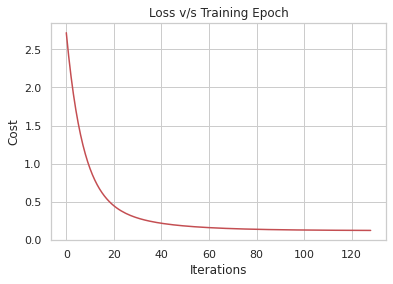

In [6]:
# Plotting the Cost(Loss)
plt.plot(np.arange(total_iters), costs, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss v/s Training Epoch')
plt.show()

[-0.03688355  0.73287992  0.07349291]


Text(0.5, 0.92, '3D Scatter Plot')

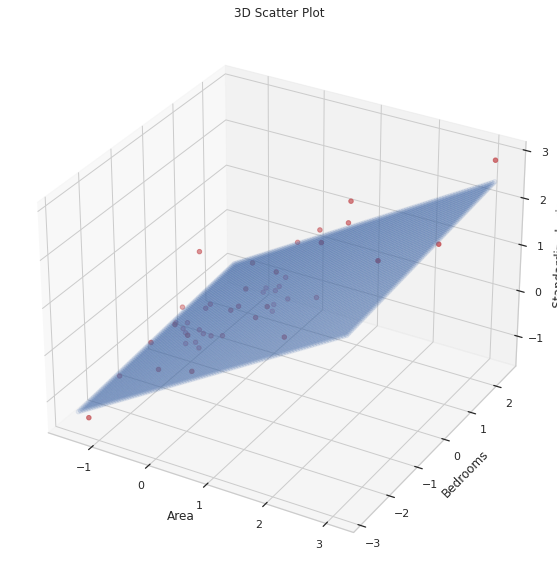

In [7]:
# Plotting the 3D scatter plot for Bedrooms vs Area vs Price:

print(theta)
XY_axis = df[['Area', 'Bedrooms']].values.reshape(-1, 2)

x_ = XY_axis[:, 0]
y_ = XY_axis[:, 1]
z_ = df['Standardized Price']

x_min = x_.min()
x_max = x_.max()
y_min = y_.min()
y_max = y_.max()

# creating a meshgrid for the plot
x_ax, y_ax = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

mesh_pt = np.c_[x_ax.ravel(), y_ax.ravel()]
z_ax = pd.DataFrame([bgd.h(mesh_pt[i]) for i in range(len(mesh_pt))]) 

fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111, projection='3d')
plot.scatter(x_, y_, z_, c='r', marker='o')
plot.scatter(mesh_pt[:,0], mesh_pt[:,1], z_ax, c='b', marker='o', alpha=0.1)

plot.set_xlabel('Area')
plot.set_ylabel('Bedrooms')
plot.set_zlabel('Standardized price')
plot.set_title('3D Scatter Plot')
    



In [8]:
# On the full batch gradient descent visualize the contours of J(W) for different values of the learning rate η.
def plot(X_train, Y_train, X_test, Y_test, alpha, theta_seed=None) :

  """
  X_train : Training datset
  Y_train : creating a training datset from given values of y 
  X_test : Testing datset
  Y_test : creating a testing datset from given values of y 
  alpha : Learning Rate
  """

  if(theta_seed is not None) :
    theta = theta_seed 
  else :
    theta = np.random.randn(3) 

  # Computing the Batch gradient descent
  bgd = Batch_gradient_descent(X_train, Y_train, alpha, 10000, 0.0001, theta) 
  theta, thetas, costs = bgd.train() 
  total_iters = len(costs) 
  thetas = np.array(thetas)
  costs = np.array(costs)
  
  # Creating a meshgrid for the x_theta and y_theta
  x_theta, y_theta = np.meshgrid(np.arange(thetas[:, 1].min()-1, thetas[:, 1].max()+1, 0.1), np.arange(thetas[:,2].min()-1, thetas[:,2].max(), 0.1)+1)
  theta_grid = np.c_[np.zeros(x_theta.ravel().shape[0]), x_theta.ravel(), y_theta.ravel()]
  for i in range(len(theta_grid)) :
    theta_grid[i][0] = theta[0]
  
  # Creating an array to store the cost 
  z_cost = []
  for theta_ in theta_grid:
    
    temp_cost = 0 
    for i in range(len(X_train)) :
      temp_cost += (bgd.h(X_train[i], theta_) - Y_train[i])**2

    temp_cost /= 2*len(X_train) 
    z_cost.append(temp_cost)

  z_cost = np.array(z_cost).reshape(x_theta.shape)
  fig = plt.figure(figsize=(6,6))

  # Plotting the Contours
  plot = fig.subplots(1,1)
  
  plot.contourf(x_theta, y_theta, z_cost, cmap=plt.cm.hot,  levels = np.linspace(z_cost.min(), z_cost.max(), 30))
   
  plot.text(0.05, 0.95, r'$\alpha$'+' = %.2f' % alpha, transform=plot.transAxes, verticalalignment='top')
  plot.set_xlabel(r'$w_1$')
  plot.set_ylabel(r'$w_2$')
  plot.set_title('Batch Gradient Descent w.r.t ' + r'$\alpha$'+' in Contours of Cost Function')
  for [_, _x, _y] in thetas:
    plot.scatter(_x, _y, c='grey', s=30)
        
  plt.show()
  


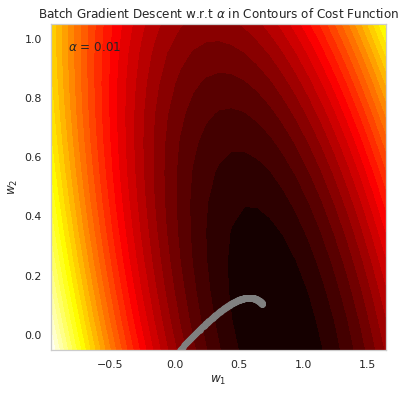

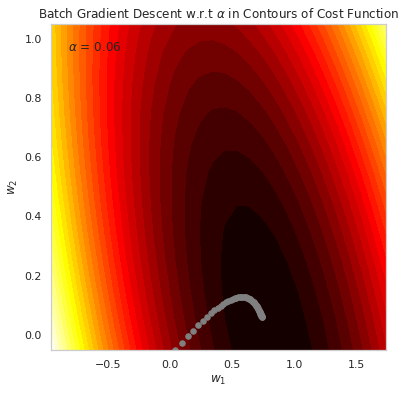

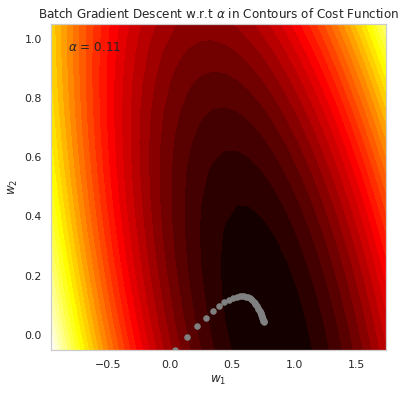

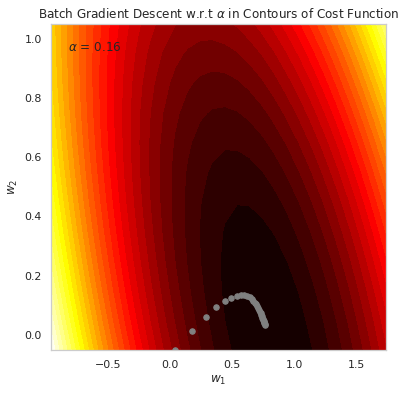

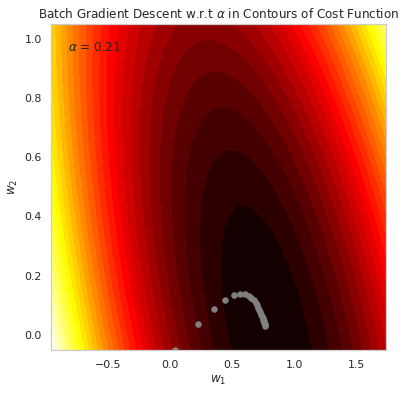

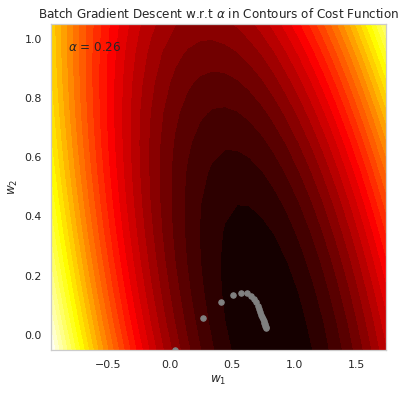

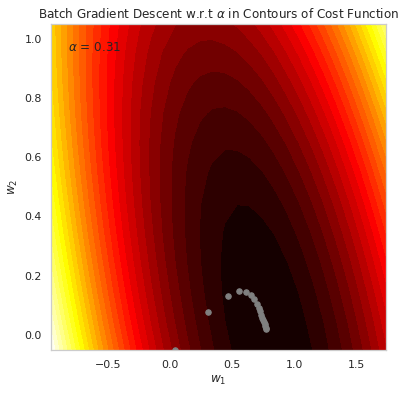

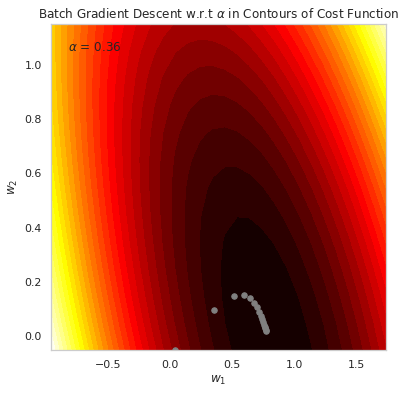

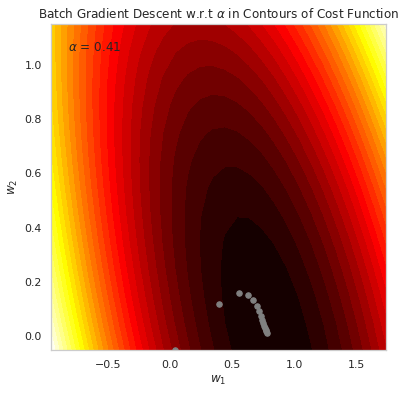

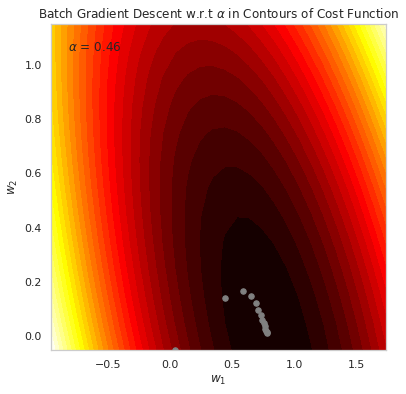

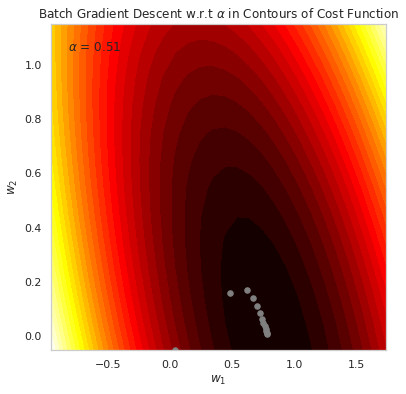

In [9]:
theta = np.random.randn(3)

for alpha_ in np.arange(0.01, 0.56, 0.05) :
  plot(X_train, Y_train, X_test, Y_test, alpha_, theta)